In [1]:
import torch
from torch import nn
import sys
sys.path.append('/mnt/Disk16T/chenhr/VAE-CVAE-MNIST')
from models import VAE
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
device = 'cuda:0'

vae = VAE([64, 32], 16, [32, 64], conditional=True, num_labels=13).to(device)
vae.load_state_dict(torch.load('fea_vae.pth', map_location=device))

<All keys matched successfully>

In [3]:
def gen_color(y):
    """
    y.shape = (n,)
    """
    color_map = [[0, 255, 0], [0, 0, 255], [136, 206, 250],
                 [255, 255, 0], [255, 0, 255], [255, 0, 0],
                 [107, 142, 35], [255, 165, 0], [153, 50, 204],
                 [139, 26, 26], [0, 100, 0], [156, 156, 156], [0, 0, 0]]
    color_map = np.asarray(color_map, dtype=np.float32)
    res = np.zeros((len(y), 3))
    for i in range(13):
        mask = (y == i)
        res[mask] = color_map[i]
    return res

In [4]:
c = torch.randint(0, 13, (10000, ), dtype=torch.long, device=device)
z = torch.randn((c.shape[0], 16), device=device)
with torch.no_grad():
    fea = vae.inference(z, c)

In [5]:
fea, c = fea.to('cpu').numpy(), c.to('cpu').numpy()
c_color = gen_color(c) / 255

/home/lindi/anaconda3/envs/pytorch1.10/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


([], [])

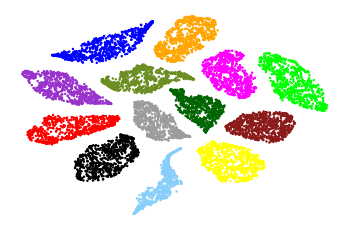

In [6]:
tsne = TSNE(init='pca', learning_rate='auto', n_iter=300)
low_f = tsne.fit_transform(fea)

plt.scatter(low_f[:, 0], low_f[:, 1], c=c_color, s=2)
plt.axis('off')
plt.xticks([])
plt.yticks([])
# plt.savefig('./epsc.png', dpi=800)